In [36]:
from baseUnits import m, ft, mm, kg, kgf, N, MPa, km, h, kgf


In [37]:
rho=2400*(kgf/(m**3))  # Density of concrete

print(rho.to_base())

KeyError: 'No base unit registered for dimension Length^-2 * Mass^1 * Time^-2'

In [ ]:

# 1. Create Quantities
length_1 = 10 * m
length_2 = 5 * ft
length_3 = 300 * mm

force= 20*kgf
area= 2*mm**2

area2= area.to(m**2)  # Convert area to m²

stress= force/area

print(length_1)
# Output: 10.0 m

print(length_1+length_2)
print(length_1-length_3)
print(length_1*length_3)
print((length_1*length_3).to(m**2))  # Convert to m²
print(length_1/length_3)

print(length_2)
# Output: 5.0 ft

print(area2)

print(stress)

print(stress.to(N/mm**2))  # Convert stress to N/mm²

print(stress.to(MPa))      # Convert stress to MPa

print(stress.to_base())



10.0 m
11.524 m
9.7 m
3000.0 (m*mm)
3.0 (m**2)
0.03333333333333333 (m/mm)
5.0 ft
2e-06 (m**2)
10.0 (kgf/(mm**2))
98.07000000000001 (N/(mm**2))
98.07000000000001 MPa
98.07000000000001 MPa


In [ ]:
print((length_1/(8*s)).to(km/h))  # Convert length_1 to feet

4.5 (km/h)


--- 1. Basic Math, Conversion, and Safety ---
Length 1: 10.0 m
Length 2: 5.0 ft
Total (m):  11.524 m
Total (mm): 11524.0 mm
Total (ft): 37.808398950131235 ft

--- 2. Dimensional Safety (Error Handling) ---
Caught Error: Cannot add Length^1 and Mass^1

--- 3. Compound Units (Stress Calculation) ---
Stress (mixed): 10.0 (kgf/(mm**2))
Stress (MPa):   98.07000000000001 MPa
Stress (ksi):   14.223350253807109 ksi
Stress (Pa):    98070000.00000001 Pa
Stress (N/mm^2): 98.07000000000001 (N/(mm**2))

--- 4. Using the .to_base() Convenience Method ---
'5.0 ft' -> to_base() -> 1524.0 mm
'14.223350253807109 ksi' -> to_base() -> 98.07000000000001 MPa
'2.0 tf' -> to_base() -> 19614.0 N

--- 5. Using Physical Constants (g) ---
Mass: 100.0 kg
Weight (raw): 981.0 (kg*(m/(s**2)))
Weight (N):   981.0 N
Weight (kN):  0.981 kN
Weight (lbf): 220.54856115107913 lbf

--- 6. Using with NumPy (The Correct Way) ---

Object array (Lengths): [Quantity(1.0, m) Quantity(2.0, m) Quantity(5.0, ft) Quantity(3000.0, mm)


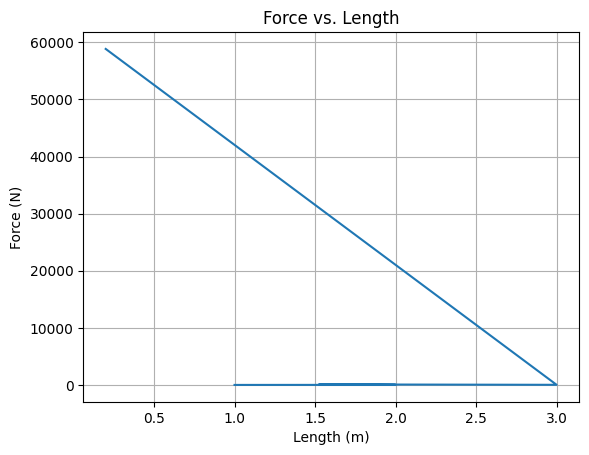


Super example complete!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from baseUnits import (
    # Core classes and helpers
    m, ft, mm, kg, s, N, kgf, lbf, tf, kN,
    MPa, ksi, Pa,
    # The .to_base() method will convert to these:
    # mm, N, tonne, s, MPa, mJ, mJ_s
)

g=9.81 * m / s**2  # Gravitational acceleration constant

print("--- 1. Basic Math, Conversion, and Safety ---")

# Quantities are created with multiplication
length_1 = 10 * m
length_2 = 5 * ft

print(f"Length 1: {length_1}")
print(f"Length 2: {length_2}")

# Arithmetic is dimension-aware. Result is in units of the left-hand object.
total_length = length_1 + length_2
print(f"Total (m):  {total_length}")

# Convert to any other unit of the same dimension
print(f"Total (mm): {total_length.to(mm)}")
print(f"Total (ft): {total_length.to(ft)}")


print("\n--- 2. Dimensional Safety (Error Handling) ---")

# This is the library's most important feature
try:
    invalid_op = 10 * m + 5 * kg
    print(f"Invalid Op: {invalid_op}")
except TypeError as e:
    print(f"Caught Error: {e}")


print("\n--- 3. Compound Units (Stress Calculation) ---")

# Define force and area in different units
force = 20 * kgf
area = 2 * mm**2  # We can square a unit

# Division automatically creates a compound unit: (kgf/(mm**2))
stress = force / area
print(f"Stress (mixed): {stress}")

# We can convert this compound unit to any other unit
# with the same dimension (Force/Length^2)
print(f"Stress (MPa):   {stress.to(MPa)}")
print(f"Stress (ksi):   {stress.to(ksi)}")
print(f"Stress (Pa):    {stress.to(Pa)}")

# We can also convert to a dynamically-created unit
print(f"Stress (N/mm^2): {stress.to(N/mm**2)}")


print("\n--- 4. Using the .to_base() Convenience Method ---")

# .to_base() automatically converts any quantity
# to the library's internal consistent unit system.
# (mm, N, tonne, s, MPa, etc.)

print(f"'{length_2}' -> to_base() -> {length_2.to_base()}")
print(f"'{stress.to(ksi)}' -> to_base() -> {stress.to(ksi).to_base()}")

force_tf = 2 * tf
print(f"'{force_tf}' -> to_base() -> {force_tf.to_base()}")


print("\n--- 5. Using Physical Constants (g) ---")

# 'g' is a Quantity object: 9.81 m/s^2
mass = 100 * kg
print(f"Mass: {mass}")

# Quantity math works with constants
weight = mass * g
print(f"Weight (raw): {weight}")

# The result is a compound unit, which we can convert
print(f"Weight (N):   {weight.to(N)}")
print(f"Weight (kN):  {weight.to(kN)}")
print(f"Weight (lbf): {weight.to(lbf)}")


print("\n--- 6. Using with NumPy (The Correct Way) ---")

# You cannot put different dimensions in one array
# np.array([10*m, 5*s])  <-- This is 'apples and oranges'

# 1. Create NumPy arrays with 'dtype=object'
#    All units must have the same dimension (e.g., Length)
lengths_obj = np.array([1*m, 2*m, 5*ft, 3000*mm, 0.2*m])
forces_obj = np.array([10*N, 5*lbf, 0.1*kN, 3*kgf, 6*tf])

print(f"\nObject array (Lengths): {lengths_obj}")
print(f"Object array (Forces):  {forces_obj}")

# 2. To plot or do math, you MUST convert them to
#    simple float arrays in a consistent unit.

# Use a list comprehension and the .value property
lengths_in_meters = np.array([L.to(m).value for L in lengths_obj])
forces_in_newtons = np.array([F.to(N).value for F in forces_obj])

print(f"\nFloat array (Lengths in m): {lengths_in_meters}")
print(f"Float array (Forces in N):  {forces_in_newtons}")

# 3. These float arrays are now ready for plotting!
#
# import matplotlib.pyplot as plt
plt.plot(lengths_in_meters, forces_in_newtons)
plt.xlabel("Length (m)")
plt.ylabel("Force (N)")
plt.title("Force vs. Length")
plt.grid(True)
plt.show()

print("\nSuper example complete!")